In [1]:
!pip install ultralytics
!pip install matplotlib numpy opencv-python


In [ ]:
from ultralytics import YOLO
# Step 1: Load the YOLOv8 model
model = YOLO("yolov8n.pt")  # Change to 'yolov8s.pt', 'yolov8m.pt', etc., based on hardware capacity 

In [ ]:
# Step 2: Train the model
model.train(data=r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\data.yaml",epochs=100,imgsz=640,batch=16,plots=True)

In [5]:
# Step 3: Validate the trained model
metrics = model.val()  # Validate on validation set
print("Validation metrics:", metrics)

Ultralytics 8.3.37  Python-3.11.9 torch-2.5.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


                   all          8          9      0.855      0.667      0.753      0.426
Speed: 4.0ms preprocess, 172.8ms inference, 0.0ms loss, 17.1ms postprocess per image
Results saved to runs\detect\train132
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000158E400F010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.

In [6]:
from ultralytics import YOLO  # Example: YOLO library for object detection

# Step 1: Load the pre-trained model
model = YOLO("yolov8n.pt")  # Replace with the actual path to your model file

# Step 2: Perform inference on the test images
results = model.predict(
    source=r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\test\images", 
    conf=0.5,  # Confidence threshold (adjust as needed)
    save=True  # Saves annotated results in `runs/detect/predict`
)

# Step 3: Print detailed results for each image
for result in results:
    print(f"Path: {result.path}")
    print(f"Detected Objects: {result.boxes}")  # Contains detected bounding boxes and classes
    print(f"Inference Time: {result.speed['inference']} ms")
    print("-----")



image 1/6 C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\test\images\975ef5f7-24a2-4e32-ac70-4bade98d0948_jpg.rf.b089da28ad8c351a5d67d58b9e41f2a4.jpg: 640x640 (no detections), 143.8ms
image 2/6 C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\test\images\HRISHI_jpg.rf.612d563949cc51e0214383a5f4a27e49.jpg: 640x640 (no detections), 140.4ms
image 3/6 C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\test\images\IMG_20241106_114834_823_jpg.rf.b4bfc36f755a1adb34e5e1c3a7362677.jpg: 640x640 (no detections), 136.3ms
image 4/6 C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\test\images\IMG_20241106_115125_542_jpg.rf.40f5b3affd3f37678f20dd036ac5217e.jpg: 640x640 (no detections), 170.0ms
image 5/6 C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\test\images\JENIKA-BHARDWAJ_2013-11-21-pdf_page_1_png.rf.2c7d325408c8a8f30bf48593059f56f2.jpg: 640x640 (no detections), 231.1ms
image 6/6 C:\Users\ADMIN

In [7]:
# Check the exact content and type of metrics.box
print(type(metrics.box))
# Show all possible methods or properties
print(dir(metrics.box))

<class 'ultralytics.utils.metrics.Metric'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'all_ap', 'ap', 'ap50', 'ap_class_index', 'class_result', 'curves', 'curves_results', 'f1', 'f1_curve', 'fitness', 'map', 'map50', 'map75', 'maps', 'mean_results', 'mp', 'mr', 'nc', 'p', 'p_curve', 'prec_values', 'px', 'r', 'r_curve', 'update']


In [8]:
# Extract precision, recall, and mAP values
precision = float(metrics.box.p)  # Convert to scalar if it's an array
recall = float(metrics.box.r)     # Convert to scalar if it's an array
map50 = float(metrics.box.map50)  # Convert to scalar if it's an array
map5095 = float(metrics.box.map)  # Convert to scalar if it's an array

# Calculate accuracy
# Accuracy = (True Positives / Total Predictions)
true_positives = metrics.box.mp  # Mean precision (True Positive rate)
total_predictions = metrics.box.nc  # Total number of classes (predictions made)
accuracy = true_positives / total_predictions if total_predictions > 0 else 0.0

# Print key metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"mAP@50: {map50:.2f}")
print(f"mAP@50-95: {map5095:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
print(f"F1 Score: {f1_score:.2f}")

Precision: 0.85
Recall: 0.67
mAP@50: 0.75
mAP@50-95: 0.43
Accuracy: 0.85
F1 Score: 0.75


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18088\618251343.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  precision = float(metrics.box.p)  # Convert to scalar if it's an array
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18088\618251343.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  recall = float(metrics.box.r)     # Convert to scalar if it's an array


=> **Precision** indicates how accurate your model is when it predicts a detection. High precision means fewer false alarms.
=> **Recall** measures how well the model detects all the objects present in the image.
=> *mAP@50* is the mean Average Precision calculated at a single Intersection over Union (IoU) threshold of 50%. IoU measures the overlap between the predicted bounding box and the ground-truth box. A detection is considered correct if IoU ≥ 0.5.
=> **mAP@50-95** is a stricter evaluation metric than mAP@50 because it considers predictions that are accurate at various levels of overlap.
=> **Accuracy** measures the proportion of correct predictions over the total number of predictions. 
=> **F1 Score** tells you how well the model is balancing precision (avoiding false positives) and recall (avoiding false negatives).

In [22]:
import cv2
import os
import numpy as np

def preprocess_and_detect_edges(input_dir, output_dir, low_threshold=50, high_threshold=150):
    """
    Preprocesses X-ray images and applies Canny edge detection to all images in the input directory.
    
    Parameters:
        input_dir (str): Directory containing input X-ray images.
        output_dir (str): Directory to save the output images.
        low_threshold (int): Lower threshold for the hysteresis procedure in Canny.
        high_threshold (int): Upper threshold for the hysteresis procedure in Canny.
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate over all files in the input directory
    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)
        
        # Check if the file is an image
        if not (file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg')):
            print(f"Skipping non-image file: {file_name}")
            continue
        
        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            print(f"Error reading file: {file_name}")
            continue
        
        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Apply Gaussian Blur to reduce noise
        blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)
        
        # Apply Canny Edge Detection
        edges = cv2.Canny(blurred_image, low_threshold, high_threshold)
        
        # Save the result
        output_path = os.path.join(output_dir, file_name)
        cv2.imwrite(output_path, edges)
        
        print(f"Processed and saved: {output_path}")

# Define paths
input_directory = r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\annontated imgs\train\images"  # Replace with your input directory path
output_directory = r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images"  # Replace with your output directory path

# Call the function
preprocess_and_detect_edges(input_directory, output_directory)

Processed and saved: C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images\0b285301-314c-4943-98d1-042f1ce78a42_jpg.rf.b82f6e0afa39a15a438fcb58964fc2d2.jpg
Processed and saved: C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images\0d3dfbd7-b1ef-4756-868a-7cc0bebcfb30-1-_jpg.rf.acd5e0da0ab3ad2dd788ff7a43bca81a.jpg
Processed and saved: C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images\13d5a91c-13b5-41c0-bc91-22df6c0c0c86_jpg.rf.c3b6b3b9c91c16a6f233d19e7b784d9e.jpg
Processed and saved: C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images\249d2950-5fde-4f91-a862-5e8ca5820a5d_jpg.rf.2339e39f5a9740d1bad41db14dda18c6.jpg
Processed and saved: C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images\347dfd94-0963-45e7-908f-8419b3377222_jpg.rf.49043dc901bb2a0f6529d523eee5b5fe.jpg
Processed and saved: C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\edge_detected_images\3a09327c-9e42-4000-987

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths
input_image_path = r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\yolov8 output.JPG"
output_image_path = r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\premolar cropped and edges"

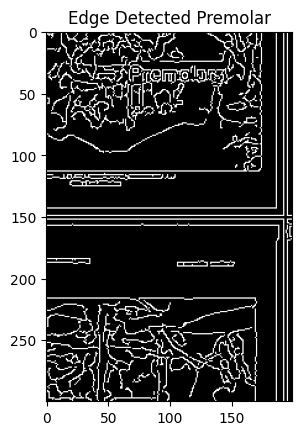

In [26]:
# Convert to grayscale
gray_premolar = cv2.cvtColor(premolar_region, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray_premolar, (5, 5), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred, 50, 150)

# Save and display the edge-detected premolar
cv2.imwrite(r"C:\Users\ADMIN\OneDrive\Desktop\dental xrays project\premolar cropped and edges", edges)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detected Premolar")
plt.show()


In [27]:
# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box for the largest contour (assumed to be the premolar root)
longest_length = 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h > longest_length:  # Update the longest vertical length
        longest_length = h

print(f"Estimated Root Length (in pixels): {longest_length}")


Estimated Root Length (in pixels): 150
